In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
# Load your dataset

filename = 'df_list_stock_sp500.csv'
data = pd.read_csv(filename)

In [114]:
print(len(data))
print(data.columns)

392
Index(['ticker', 'market', 'date_pulling', 'industry', 'sector',
       'enterpriseValue', 'totalCashPerShare', 'profitMargins', 'priceToBook',
       'debtToEquity', 'returnOnEquity', 'currentRatio', 'trailingEps',
       'Total Non Current Assets', 'Working Capital', 'Operating Income',
       'ttm_latest', 'Free Cash Flow', 'avg_MF_ROC', 'beta', 'price_current',
       'price_past', 'MF_EarningYield', 'current_MF_ROC', 'FCF_Yield',
       'PE_offset_Cash', 'PE', 'PriceIndex_6m', 'percenFCFpersharetoprice'],
      dtype='object')


In [115]:
data = data.loc[(data['MF_EarningYield'] > 0) & (data['current_MF_ROC'] > 0)]

print(data.describe())

       enterpriseValue  totalCashPerShare  profitMargins  priceToBook  \
count     3.830000e+02         383.000000     383.000000   383.000000   
mean      1.370159e+11           9.716290       0.140329     8.783105   
std       3.964715e+11          42.097718       0.111548    16.313037   
min       7.721196e+09           0.021000      -0.301790     0.438026   
25%       2.557634e+10           1.705500       0.074230     2.236946   
50%       4.766813e+10           4.490000       0.127290     4.234407   
75%       9.494896e+10           9.789000       0.186855     8.459926   
max       3.645256e+12         807.545000       0.739020   162.593980   

       debtToEquity  returnOnEquity  currentRatio  trailingEps  \
count    383.000000      383.000000    383.000000   383.000000   
mean     133.297457        0.283441      1.712039     7.458068   
std      179.311884        0.472011      1.585168    26.611952   
min        0.693000       -0.313300      0.081000   -27.510000   
25%       41

In [116]:
data['MF_Rank_EY'] = (data['MF_EarningYield'].rank(method='max'))
data['MF_Rank_ROC'] = ((data['avg_MF_ROC'] + data['current_MF_ROC'])/2).rank(method='max')
data['MF_Rank'] = data['MF_Rank_EY'] + data['MF_Rank_ROC']

data = data.set_index('ticker')

In [117]:
data_features = data[
    [
     'MF_Rank',
     'PriceIndex_6m',
     ]
]
print(data_features.columns)

Index(['MF_Rank', 'PriceIndex_6m'], dtype='object')


In [118]:
# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_features)


# Convert back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data_features.columns)

print(scaled_df.describe())

            MF_Rank  PriceIndex_6m
count  3.830000e+02   3.830000e+02
mean   1.530542e-16  -3.490101e-16
std    1.001308e+00   1.001308e+00
min   -2.147060e+00  -2.129281e+00
25%   -7.802597e-01  -5.843484e-01
50%    1.252454e-01  -1.540720e-01
75%    7.858655e-01   3.989593e-01
max    1.936256e+00   6.945181e+00


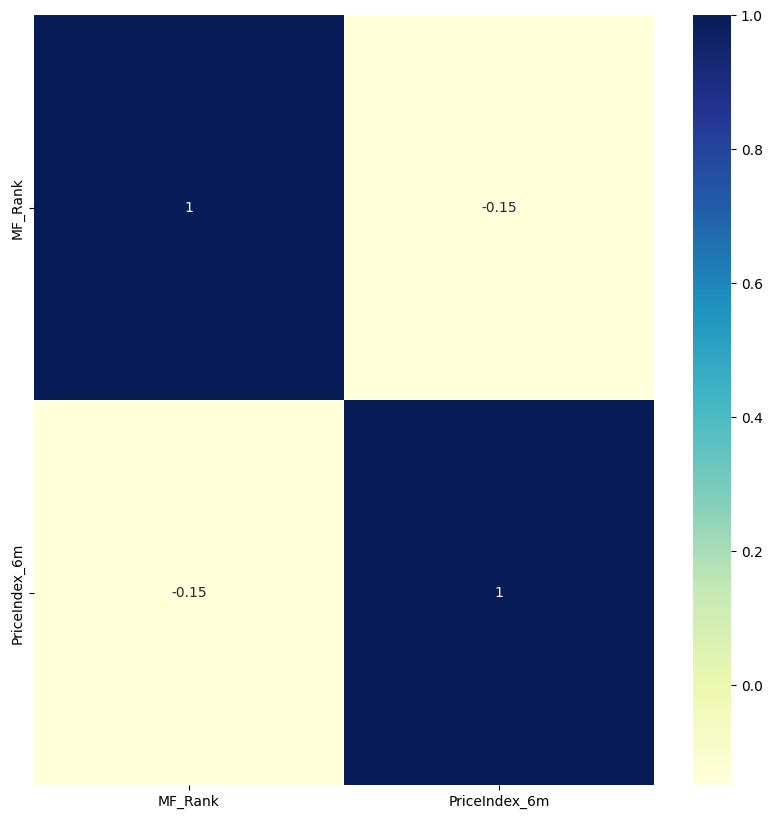

In [119]:
# Plotting correlation heatmap
fig, ax = plt.subplots(figsize=(10,10))

dataplot = sns.heatmap(round(scaled_df.corr(numeric_only=True),2), cmap="YlGnBu", annot=True,ax = ax )

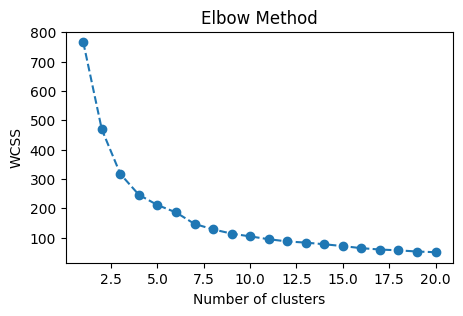

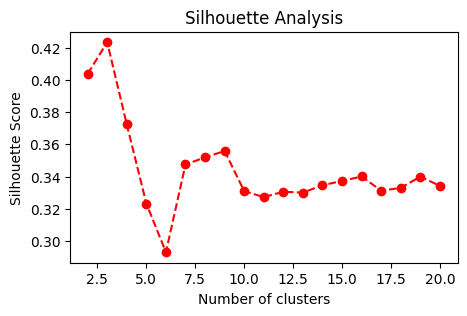

In [120]:
# Generate synthetic data

# Elbow Method
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i,random_state= 1)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(5, 3))
plt.plot(range(1, 21), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
# plt.savefig('elbow_method.png')
plt.show()

# Silhouette Analysis
silhouette_scores = []
for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=n_clusters,random_state=1)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(5, 3))
plt.plot(range(2, 21), silhouette_scores, marker='o', linestyle='--', color='r')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
# plt.savefig('silhouette_analysis.png')
plt.show()

Index(['market', 'date_pulling', 'industry', 'sector', 'enterpriseValue',
       'totalCashPerShare', 'profitMargins', 'priceToBook', 'debtToEquity',
       'returnOnEquity', 'currentRatio', 'trailingEps',
       'Total Non Current Assets', 'Working Capital', 'Operating Income',
       'ttm_latest', 'Free Cash Flow', 'avg_MF_ROC', 'beta', 'price_current',
       'price_past', 'MF_EarningYield', 'current_MF_ROC', 'FCF_Yield',
       'PE_offset_Cash', 'PE', 'PriceIndex_6m', 'percenFCFpersharetoprice',
       'MF_Rank_EY', 'MF_Rank_ROC', 'MF_Rank'],
      dtype='object')


/var/folders/jl/mqglxz2d7gb5ylw3qxtfcr340000gn/T/ipykernel_1681/3098153412.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='upper right')


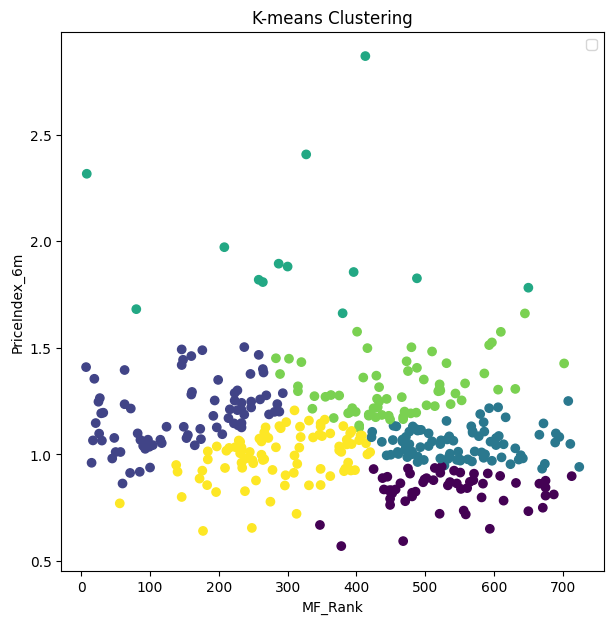

In [121]:
# K-means clustering
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters,random_state = 1)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Plotting the clusters
fig, ax1 = plt.subplots(1, 1, figsize=(7, 7))

print(data.columns)
yax = "PriceIndex_6m"
xax = "MF_Rank"

# K-means plot
ax1.scatter(data[xax], data[yax], c=kmeans_labels, cmap='viridis')
ax1.set_title('K-means Clustering')
ax1.set_xlabel(xax)
ax1.set_ylabel(yax)
ax1.legend(loc='upper right')


plt.show()

In [122]:
data['clusterno_kmeans'] = kmeans_labels
data.to_csv('clustered_'+filename,index= True)

/var/folders/jl/mqglxz2d7gb5ylw3qxtfcr340000gn/T/ipykernel_1681/407723027.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(bpdata,labels=[i for i in range(n_clusters)])


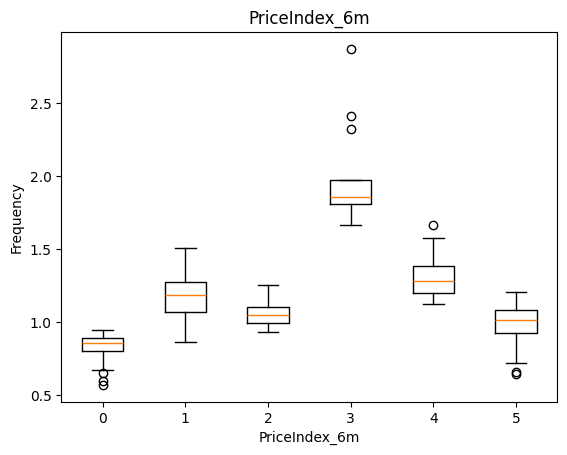

clusterno_kmeans
0    55
1    78
2    85
3    13
4    65
5    87
Name: count, dtype: int64


In [123]:
#add three histograms to one plot
bpdata = []
for i in range(0,n_clusters,1):
    bpdata.append(data['PriceIndex_6m'].loc[data['clusterno_kmeans'] == i])
    
plt.boxplot(bpdata,labels=[i for i in range(n_clusters)]) 
#add plot title and axis labels
plt.title('PriceIndex_6m')
plt.xlabel('PriceIndex_6m')
plt.ylabel('Frequency')

#display plot
plt.show()
print(data['clusterno_kmeans'].value_counts().sort_index())

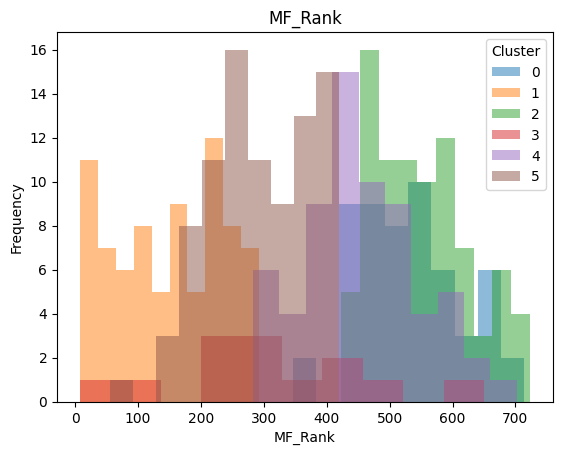

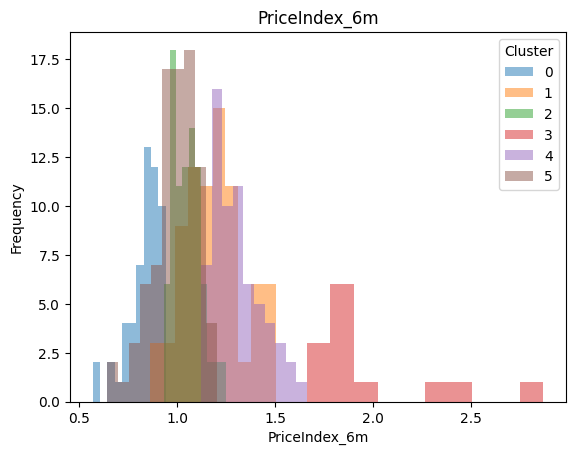

In [124]:
import matplotlib.pyplot as plt

for j in list(data_features.columns) :
    ind = j
    for i in range(0,n_clusters,1):
        #add three histograms to one plot
        plt.hist(data[ind].loc[data['clusterno_kmeans'] == i], alpha=0.5, label=i)


    #add plot title and axis labels
    plt.title(j)
    plt.xlabel(j)
    plt.ylabel('Frequency')

    #add legend
    plt.legend(title='Cluster')
    #display plot
    plt.show()

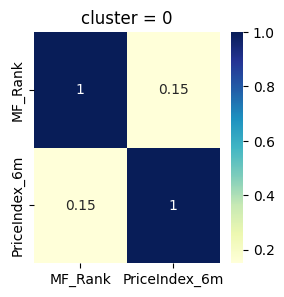

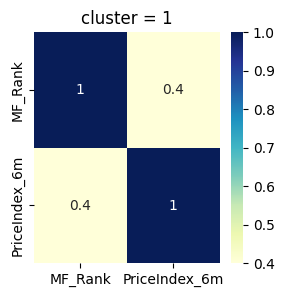

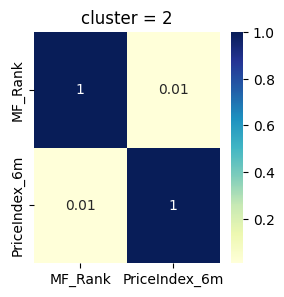

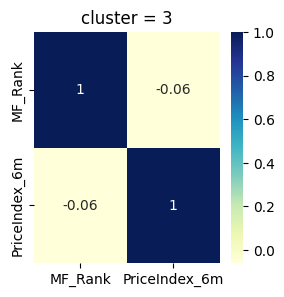

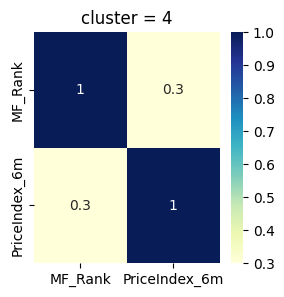

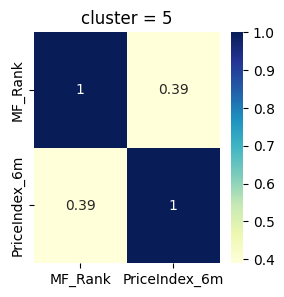

In [125]:
# Plotting correlation heatmap
for i in range(0,n_clusters,1):
    fig, ax = plt.subplots(figsize=(3,3))
    ax.set_title('cluster = ' + str(i))
    dataplot = sns.heatmap(round(data[data_features.columns].loc[data['clusterno_kmeans'] == i].corr(numeric_only=True),2), cmap="YlGnBu", annot=True,ax = ax )

In [126]:
print(data.loc[data['clusterno_kmeans'] == 3])

       market date_pulling                                 industry  \
ticker                                                                
TSLA    sp500   2025-02-05                       Auto Manufacturers   
NFLX    sp500   2025-02-05                            Entertainment   
CEG     sp500   2025-02-05                    Utilities - Renewable   
FTNT    sp500   2025-02-05                Software - Infrastructure   
RCL     sp500   2025-02-05                          Travel Services   
LULU    sp500   2025-02-05                           Apparel Retail   
AXON    sp500   2025-02-05                      Aerospace & Defense   
VST     sp500   2025-02-05  Utilities - Independent Power Producers   
DAL     sp500   2025-02-05                                 Airlines   
LYV     sp500   2025-02-05                            Entertainment   
CCL     sp500   2025-02-05                          Travel Services   
UAL     sp500   2025-02-05                                 Airlines   
NCLH  